In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import factorial

In [21]:
alpha = (0 + 8 + 9) % 6
alpha

5

In [22]:
#a
PP=np.array([[1/20, 1/60, 1/30],[1/10, 1/30, 1/15],[1/10, 3/20, 0],[1/5, 1/15, 2/15]])

PP_2_2=1-PP.sum(axis=(0,1))  
PP_2_2

0.050000000000000044

In [23]:
PP[2,2]=PP_2_2   
PP

array([[0.05      , 0.01666667, 0.03333333],
       [0.1       , 0.03333333, 0.06666667],
       [0.1       , 0.15      , 0.05      ],
       [0.2       , 0.06666667, 0.13333333]])

In [24]:
#b)
Px = PP.sum(axis=1)
Py = PP.sum(axis=0)

print(Px)
print(Py)

[0.1 0.2 0.3 0.4]
[0.45       0.26666667 0.28333333]


In [25]:
#c
np.outer(Px, Py) - PP #It's not independant, because numbers are not zero

array([[-0.005,  0.01 , -0.005],
       [-0.01 ,  0.02 , -0.01 ],
       [ 0.035, -0.07 ,  0.035],
       [-0.02 ,  0.04 , -0.02 ]])

In [26]:
#d 
#expectation
x=np.array([-(alpha+1), 0, 5*(alpha+1), 10*(alpha+1)])
y=np.array([10*(alpha+1), 0, 20*(alpha+1)])
Ex=np.dot(Px,x)
Ey=np.dot(Py,y)
Ex,Ey

(32.400000000000006, 61.00000000000001)

In [27]:
#variance
Ex2=np.dot(Px,x**2)
Ey2=np.dot(Py,y**2)
varX= Ex2-Ex**2
varY= Ey2-Ey**2
varX,varY

(663.8399999999997, 1979.0)

In [28]:
#coveriance
nx=x-Ex 
ny=y-Ey

cov=0
for i in range(len(x)):
    for j in range(len(y)):
        cov+=PP[i,j]*nx[i]*ny[j]
cov

21.599999999999994

In [29]:
# Standard Deviation
Ex2=np.dot(Px,x**2)
Ey2=np.dot(Py,y**2)
stdX= np.sqrt(Ex2-Ex**2)
stdY= np.sqrt(Ey2-Ey**2)
stdX,stdY

(25.76509266430066, 44.48595283907045)

In [30]:
# Correlation coefficient
cov/(stdX*stdY)

0.018845130329824756

In [31]:
#e
quantile_index=[i for i in np.arange(0,len(Px)) if (np.sum(Px[:i+1]) >= 0.75) and (np.sum(Px[i:]) >= float(1-0.75))]

third=np.mean(x[quantile_index])
third

60.0

In [32]:
#f

In [36]:
#2.
from scipy.stats import binom 

n = 10
p = 0.2

r_values = list(range(n + 1)) 

mean, var = binom.stats(n, p)
median = np.median(binom.stats(n, p))

P_exp = [binom.pmf(r, n, p) for r in r_values] 

for i in range(n + 1): 
	print(str(r_values[i]) + "\t" + str(P_exp[i])) 
# printing mean and variance 
print("mean = "+str(mean)) 
print("median = "+str(median))
print("variance = "+str(var))

0	0.1073741824
1	0.2684354560000003
2	0.301989888
3	0.20132659200000022
4	0.08808038400000008
5	0.02642411520000004
6	0.00550502400000001
7	0.0007864320000000006
8	7.372800000000005e-05
9	4.096000000000007e-06
10	1.0240000000000004e-07
mean = 2.0
median = 1.8
variance = 1.6


In [37]:
k=np.arange(alpha+10+1)

E_exp=np.sum(np.array([z*k for k,z in zip(k,P_exp)]))
E_exp

2.0000000000000013

In [38]:
#d)
quant_index=[i for i in np.arange(0,len(P_exp)) if (np.sum(P_exp[:i+1]) >= 0.6) and  (np.sum(P_exp[i:]) >= (1-0.6))]
quant=np.mean(k[quant_index])
quant

2.0

In [40]:
#3
#a)
attribute=["New York"]

df1 = pd.read_csv('humidity.csv', usecols=attribute)
df2 = pd.read_csv('pressure.csv', usecols=attribute)

In [41]:
df = pd.concat([df1, df2], axis=1)
df.columns = ["Hum", "Press"]
df.head()

,Hum,Press
0,NaN,NaN
1,58.0,1012.0
2,57.0,1012.0
3,57.0,1012.0
4,57.0,1012.0


In [42]:
df.dropna().describe()

,Hum,Press
count,18706.000000,18706.000000
mean,65.923607,1015.300919
std,19.434199,11.625749
min,10.000000,959.000000
25%,51.000000,1011.000000
50%,67.000000,1017.000000
75%,81.000000,1022.000000
max,100.000000,1051.000000


In [43]:
df.quantile(0.7)

Hum        80.0
Press    1021.0
Name: 0.7, dtype: float64

In [45]:
#b

df.cov()['Hum']['Press']/(df.std()['Hum']*df.std()['Press'])

-0.12489342229417516

In [47]:
df.corr()

,Hum,Press
Hum,1.000000,-0.122679
Press,-0.122679,1.000000


In [48]:
alpha1 = 0.01
order=1-alpha1/2
sample_size = 200
Quant = stats.t.ppf(order, df=sample_size-1)
sample_of_means = []

CIs = []
for i in range(70):

    generated_sample=df['Hum'].sample(sample_size)
    sample_of_means.append(generated_sample.mean())

    margin = Quant * (generated_sample.std()/sample_size**0.5)
    CI_MO = (generated_sample.mean() - margin, generated_sample.mean() + margin)
    CIs.append(CI_MO)

print(df['Hum'].mean())
CIs

67.22317562780445


[(64.2150154736456, 71.8478117514853),
 (63.623803542789, 70.94029902131356),
 (61.34551335719701, 68.89532433913809),
 (63.76040682714535, 70.82420855747002),
 (66.18125843476655, 72.91617746266935),
 (64.20961729930235, 71.66339857371352),
 (60.22472712800482, 67.67270876943108),
 (63.09257232715909, 70.1374276728409),
 (64.10461622654681, 71.0891010509401),
 (63.21946864605737, 70.11386468727596),
 (62.51978206419647, 69.25572813988516),
 (64.91426386841859, 72.11137715722244),
 (64.76841325658694, 71.93865745048376),
 (63.999052736378296, 71.03187509867325),
 (64.02037131293022, 71.10207766666161),
 (62.91923295279965, 70.03995072066975),
 (62.789134876735915, 69.58199914388265),
 (62.36730532039509, 69.35290193349091),
 (64.54141257185799, 71.40730537685997),
 (63.96097221067317, 71.05922980952884),
 (65.35219853293444, 72.22293100074432),
 (64.96018063582325, 71.88518018891902),
 (64.51182082119921, 71.30067917880079),
 (67.5273514566963, 74.72775058412003),
 (63.2311111814045, 7

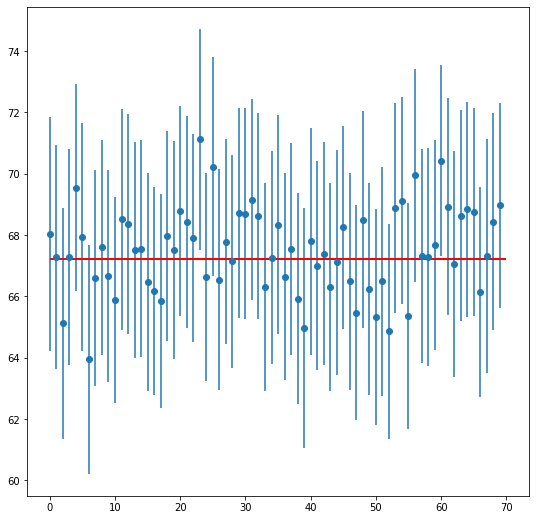

In [49]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0, 70), 
             y=sample_of_means[0:70], 
             yerr=[(up-down)/2 for up,down in CIs],
             fmt='o')

plt.hlines(xmin=0, xmax=70,
           y=df.mean()['Hum'], 
           linewidth=2.0,
           color="red")

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


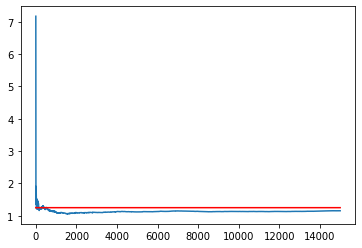

In [57]:
#4
#a
n=15000
k = range(1,n+1)
y = np.random.standard_t(alpha+10, size=n)
m = [np.var(y[0:i], ddof=1) for i in range(1,n+1)] 
plt.plot(k, m, k, [1.25]*n,'r')


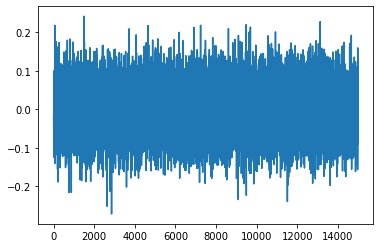

In [64]:
#b
number_of_samples = 50 * (alpha + 1)
number_of_samples_of_means=15000 

xs= np.random.standard_t(alpha+10, size=(number_of_samples,number_of_samples_of_means))

samples_of_means = np.mean(xs,axis=0) 
plt.plot(samples_of_means)
plt.show()

In [65]:
r = int(1 + (3.3 * np.log(len(samples_of_means)))) # calculate the numbers of bins
r

32

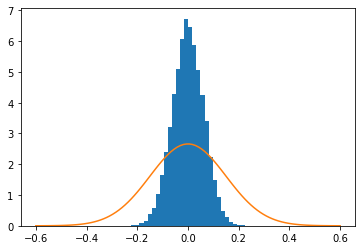

In [66]:
plt.hist(samples_of_means,bins=r,density=True);

x=np.linspace(-0.6,0.6,100)

plt.plot(x,stats.norm.pdf(x,loc=0, scale=0.15)) 
plt.show()
plt.show()